# Image filtering and correction
## Tasks
* Substract from the original image its filtered copy
* Filter Lena from salt and pepper
* Make intensity correction by R(x, y, sigma) = log[I(x, y)] — log[I(x, y)*G(x, y, sigma)]
,where G - gaussian, sigma - coef of blurring, * - convolution
remapping of image from (-1,1) to (0,255) with I = 255*I + 127


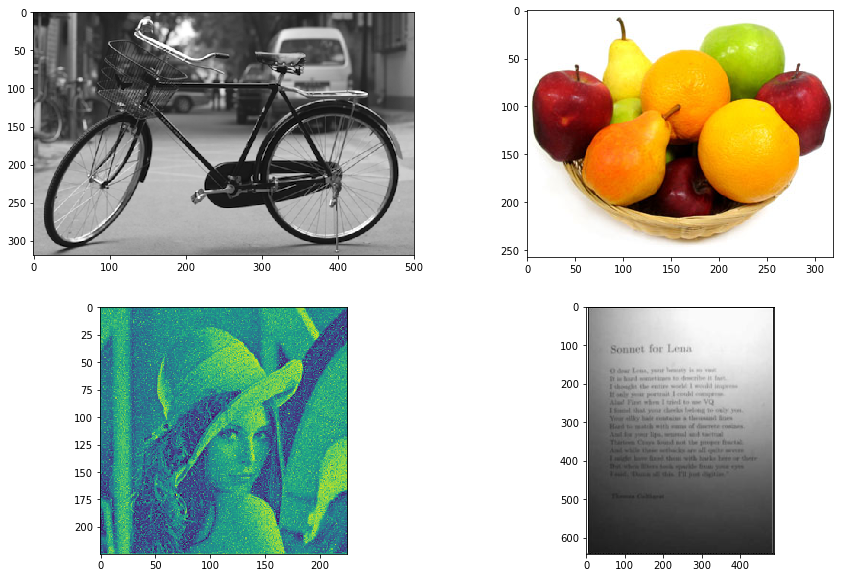

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imbyc = img.imread('./bycicle.png')
imlen = img.imread('./lena-2.png')
imfru = img.imread('./unnamed.png')
imbook = img.imread('./book.png')
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imbyc,cmap='gray')
plt.subplot(222)
plt.imshow(imfru)
plt.subplot(223)
plt.imshow(imlen)
plt.subplot(224)
plt.imshow(imbook)


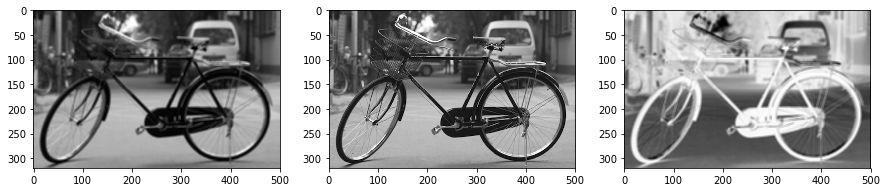

In [27]:
from scipy import ndimage
import numpy as np
k = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
flt = ndimage.convolve(imbyc, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-flt),cmap='gray')

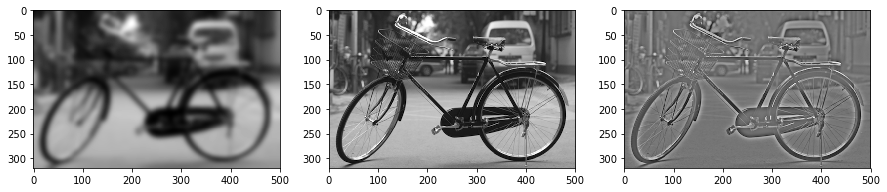

In [21]:
from scipy import ndimage as nimg
import numpy as np
gflt = nimg.gaussian_filter(imbyc, sigma=5)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-gflt),cmap='gray')

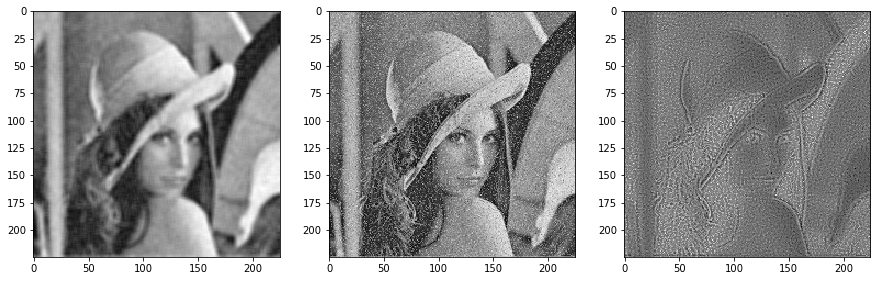

In [19]:
from scipy import ndimage
import numpy as np
imlen = img.imread("./lena-2.png")
k = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
flt = ndimage.convolve(imlen, k, mode='nearest', cval=0.0)
fmin = flt.min()
fmax = flt.max()
flt = (flt-fmin)/(fmax-fmin)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imlen,cmap='gray')
plt.subplot(133)
plt.imshow(imlen-flt,cmap='gray')

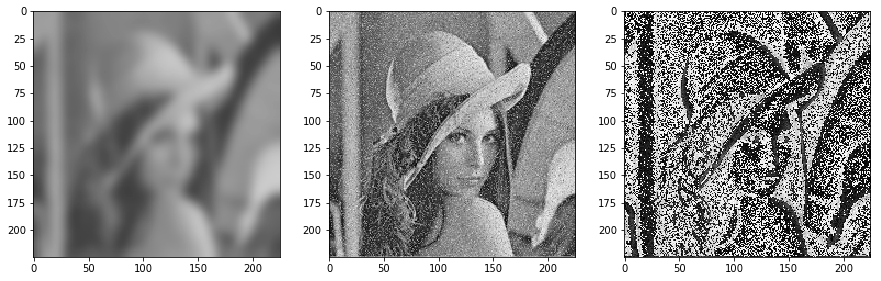

In [9]:
from scipy import ndimage as nimg
import numpy as np
gflt = nimg.gaussian_filter(imlen, sigma=5)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt,cmap='gray')
plt.subplot(132)
plt.imshow(imlen,cmap='gray')
plt.subplot(133)
plt.imshow((imlen-gflt),cmap='gray')

1.88123
-6.15639


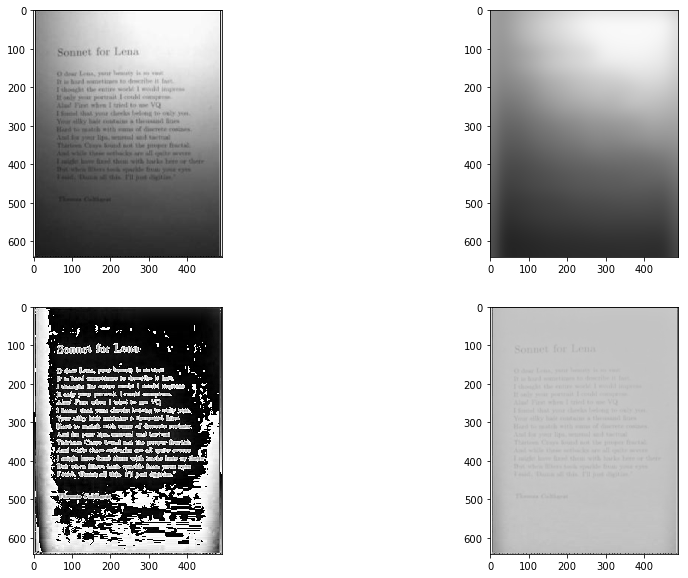

In [22]:
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
im = ndimage.gaussian_filter(imbook, sigma=20)
fig = plt.figure(figsize=(15,10))
imk = np.log2(imbook) - np.log2(im)
imkk = imk
maxi = np.max(imk)
mini = np.min(imk)
print(maxi)
print(mini)
imk = (imk - mini)/(maxi - mini)
plt.subplot(221)
plt.imshow(imbook, cmap='gray')
plt.subplot(222)
plt.imshow(im, cmap='gray')
plt.subplot(223)
plt.imshow(imkk, cmap='gray')
plt.subplot(224)
plt.imshow(imk, cmap='gray')
plt.show()